In [180]:
import pandas as pd
import preliz as pz
import numpy as np
import pymc as pm
from scipy.stats import stats
import matplotlib as plt
plt.rcParams["figure.figsize"] = (15, 3)
plt.style.use('ggplot')

In [181]:
y = [6, 11, 12, 9, 11, 10, 9, 18, 9, 18, 12, 14, 9, 11, 10,
     15, 13, 11, 14, 12, 11, 8, 11, 13, 11, 12, 20, 5, 13, 16]
y = [float(i) for i in y]

# Exercise 1

In [182]:
np.mean(y)

11.8

In [183]:
np.var(y)

10.76

In [184]:
pz.Poisson(y)

Poisson(mu=[6, 11, 12, 9, 11, 10, 9, 18, 9, 18, 12, 14, 9, 11, 10, 15, 13, 11, 14, 12, 11, 8, 11, 13, 11, 12, 20, 5, 13, 16])

<Axes: >

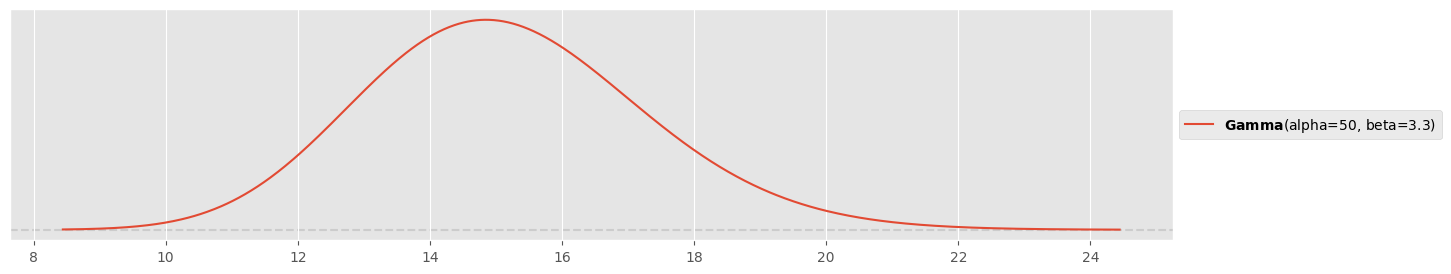

In [185]:
s = 50
r = 3.3
pz.Gamma(s, r).plot_pdf()

In [186]:
with pm.Model() as model:
    lbd = pm.Gamma('lbd', alpha=s, beta=r)
    trace = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lbd]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


array([[<Axes: title={'center': 'lbd'}>, <Axes: title={'center': 'lbd'}>]],
      dtype=object)

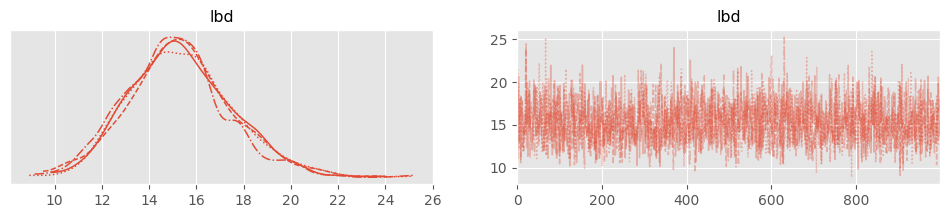

In [187]:
pm.plot_trace(trace)

<Axes: title={'center': 'lbd'}>

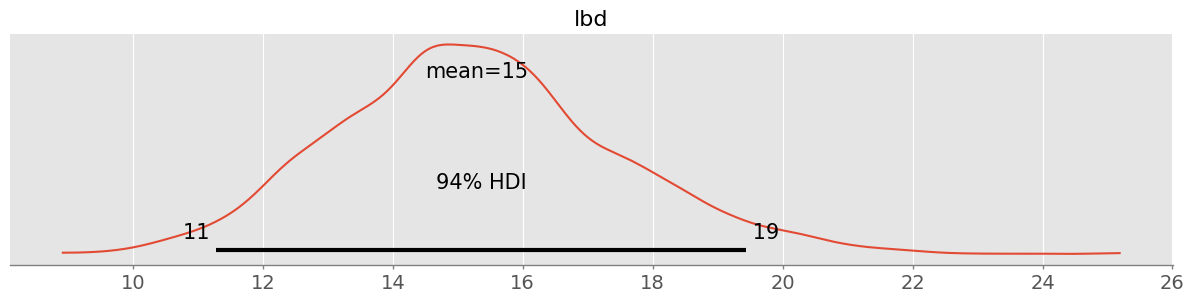

In [188]:
pm.plot_posterior(trace)

In [189]:
with pm.Model() as model:
    lbd = pm.Gamma('lbd', alpha=s, beta=r)
    y_obs = pm.Poisson('y_obs', mu=lbd, observed=y)
    trace = pm.sample(10_000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lbd]


Output()

Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 2 seconds.


array([[<Axes: title={'center': 'lbd'}>, <Axes: title={'center': 'lbd'}>]],
      dtype=object)

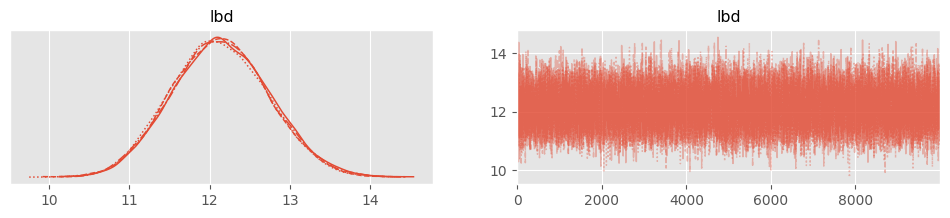

In [190]:
pm.plot_trace(trace)

array([<Axes: title={'center': 'lbd\n0'}>,
       <Axes: title={'center': 'lbd\n1'}>,
       <Axes: title={'center': 'lbd\n2'}>,
       <Axes: title={'center': 'lbd\n3'}>], dtype=object)

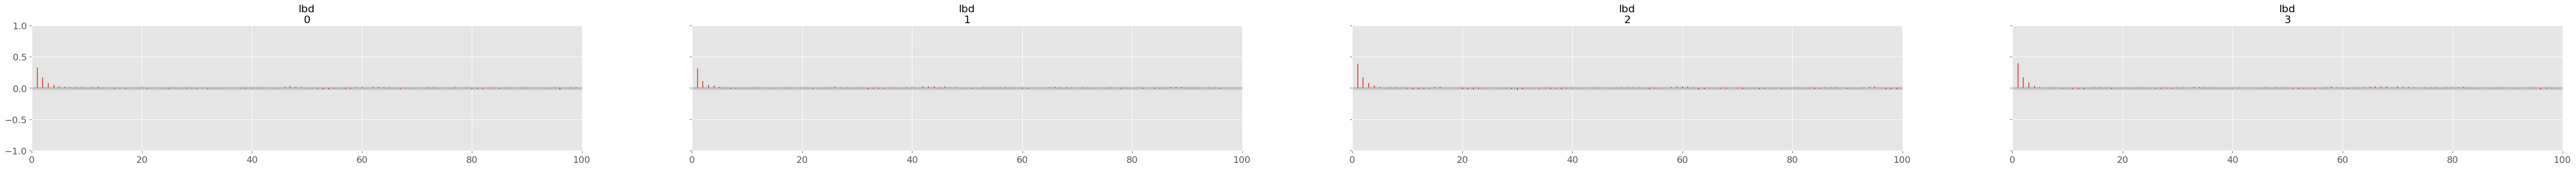

In [191]:
pm.plot_autocorr(trace)

In [192]:
pm.rhat(trace)

<xarray.Dataset> Size: 8B
Dimensions:  ()
Data variables:
    lbd      float64 8B 1.0

In [193]:
pm.ess(trace)

<xarray.Dataset> Size: 8B
Dimensions:  ()
Data variables:
    lbd      float64 8B 1.716e+04

<Axes: title={'center': 'lbd'}>

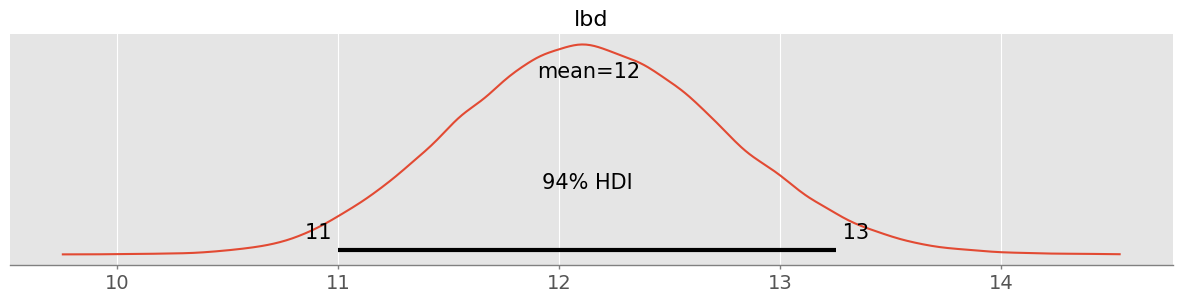

In [194]:
pm.plot_posterior(trace)

<Axes: title={'center': 'lbd'}>

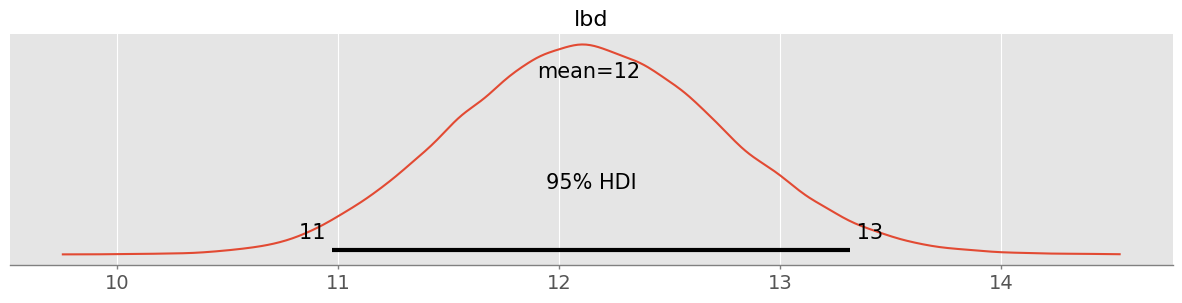

In [195]:
pm.plot_posterior(trace, hdi_prob=0.95)

In [196]:
pm.summary(trace, hdi_prob=0.95)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
lbd,12.135,0.606,10.971,13.319,0.005,0.003,17160.0,27473.0,1.0


In [197]:
with model:
    y_new = pm.Poisson('y_new', mu=lbd)
    predictions = pm.sample_posterior_predictive(trace, var_names=["y_new"])

Sampling: [y_new]


Output()

In [198]:
365 * np.mean(predictions.posterior_predictive.y_new > 20).values

5.05525

In [199]:
aleatoric_var = np.mean(trace.posterior.lbd.values)
epistemic_var = np.var(trace.posterior.lbd.values)
pred_var = np.var(predictions.posterior_predictive.y_new.values)
np.round(np.array([aleatoric_var, epistemic_var]) / (aleatoric_var + epistemic_var) * 100, 1)

array([97.1,  2.9])

# Exercise 2

In [200]:
y_b = [181, 152, 148, 146, 171]
y_a = [163, 153, 146, 126, 142]

In [201]:
with pm.Model() as railway_counter_queue_model:
    μ_b = pm.Normal('μ_b', mu=np.mean(y_b), sigma=np.std(y_b, ddof=1))
    μ_a = pm.Normal('μ_a', mu=np.mean(y_a), sigma=np.std(y_a, ddof=1))
    σ_b = pm.Exponential('σ_b', lam=1 / np.std(y_b, ddof=1))
    σ_a = pm.Exponential('σ_a', lam=1 / np.std(y_a, ddof=1))
    y_b = pm.Normal('y_b', mu=μ_b, sigma=σ_b, observed=y_b)
    y_a = pm.Normal('y_a', mu=μ_a, sigma=σ_a, observed=y_a)
    trace = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ_b, μ_a, σ_b, σ_a]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


array([[<Axes: title={'center': 'μ_a'}>, <Axes: title={'center': 'μ_a'}>],
       [<Axes: title={'center': 'μ_b'}>, <Axes: title={'center': 'μ_b'}>],
       [<Axes: title={'center': 'σ_a'}>, <Axes: title={'center': 'σ_a'}>],
       [<Axes: title={'center': 'σ_b'}>, <Axes: title={'center': 'σ_b'}>]],
      dtype=object)

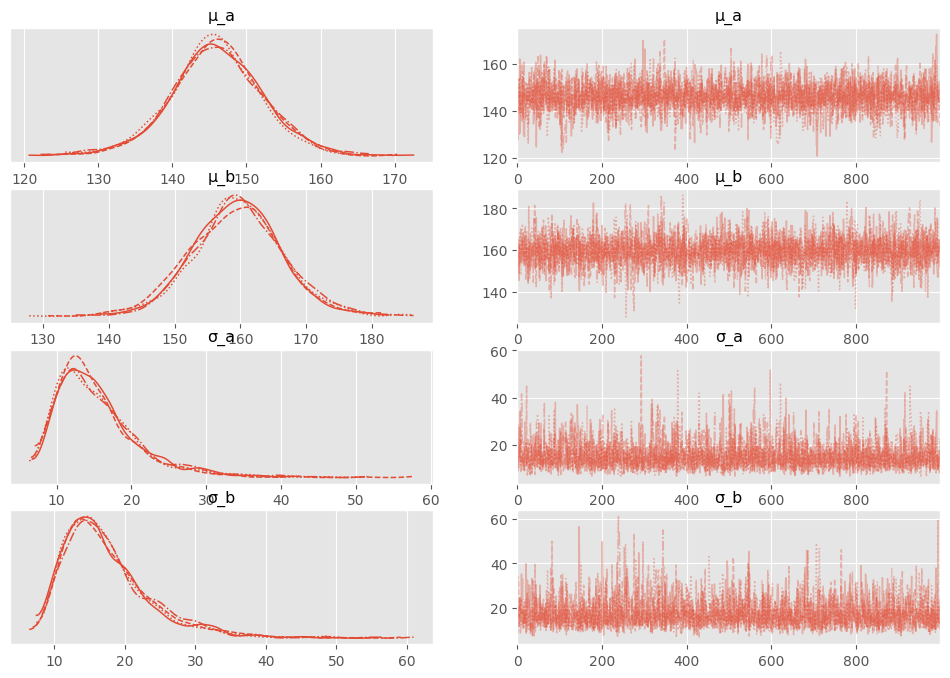

In [202]:
pm.plot_trace(trace)

In [203]:
rel_diff = (trace.posterior.μ_b - trace.posterior.μ_a) / trace.posterior.μ_b
rel_diff

<xarray.DataArray (chain: 4, draw: 1000)> Size: 32kB
array([[0.12788167, 0.08490442, 0.18436528, ..., 0.07178363, 0.0654534 ,
        0.08953378],
       [0.02532163, 0.10241072, 0.10804376, ..., 0.14081374, 0.09844252,
        0.12895554],
       [0.10625136, 0.11793906, 0.04095881, ..., 0.01719931, 0.12651544,
        0.18743104],
       [0.0796182 , 0.08511132, 0.02821397, ..., 0.09300412, 0.08526345,
        0.10761649]])
Coordinates:
  * chain    (chain) int64 32B 0 1 2 3
  * draw     (draw) int64 8kB 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999

In [204]:
pm.hdi(rel_diff, hdi_prob=0.8).x.values

array([0.01583552, 0.15581034])

* $H_1$: $(\mu_b - \mu_a)/\mu_b \geq 20$%
* $H_2$: $(\mu_b - \mu_a)/\mu_b < 20$%

In [205]:
PH1d = np.mean(rel_diff.values >= 0.2)
PH1d

0.01725

In [206]:
PH2d = 1 - PH1d
PH2d

0.98275

In [207]:
posterior_odds = PH1d / PH2d
posterior_odds

0.017552785550750447

In [208]:
PH3d = np.mean(rel_diff.values >= 0.1)
PH3d

0.38875

In [209]:
with railway_counter_queue_model:
    y_new_b = pm.Normal('y_new_b', mu=μ_b, sigma=σ_b)
    y_new_a = pm.Normal('y_new_a', mu=μ_a, sigma=σ_a)
    predictions = pm.sample_posterior_predictive(trace, var_names=["y_new_b", "y_new_a"])

Sampling: [y_new_a, y_new_b]


Output()

In [210]:
aleatoric_var_b = np.mean( trace.posterior.σ_b.values**2 )
epistemic_var_b = np.var( trace.posterior.μ_b.values )
aleatoric_var_a = np.mean( trace.posterior.σ_a.values**2 )
epistemic_var_a = np.var( trace.posterior.μ_a.values )

In [211]:
np.round( np.array( [aleatoric_var_b, epistemic_var_b] ) / (aleatoric_var_b+epistemic_var_b) * 100, 1 )

array([87.6, 12.4])

In [212]:
np.round( np.array( [aleatoric_var_a, epistemic_var_a] ) / (aleatoric_var_a+epistemic_var_a) * 100, 1 )

array([87.3, 12.7])

# Exercise 3

<Axes: >

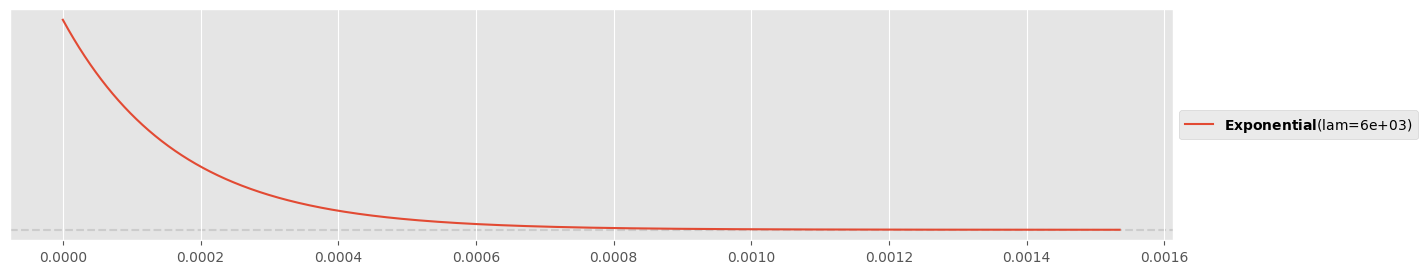

In [213]:
mean_rate = 5 / 30000
pz.Exponential(lam=1 / mean_rate).plot_pdf()

In [214]:
with pm.Model() as defective_screw_model:
    pi = pm.Exponential('pi', lam=1 / mean_rate)
    y = pm.Binomial('y', n=30_000, p=pi, observed=5)
    trace = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [pi]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


<Axes: title={'center': 'pi'}>

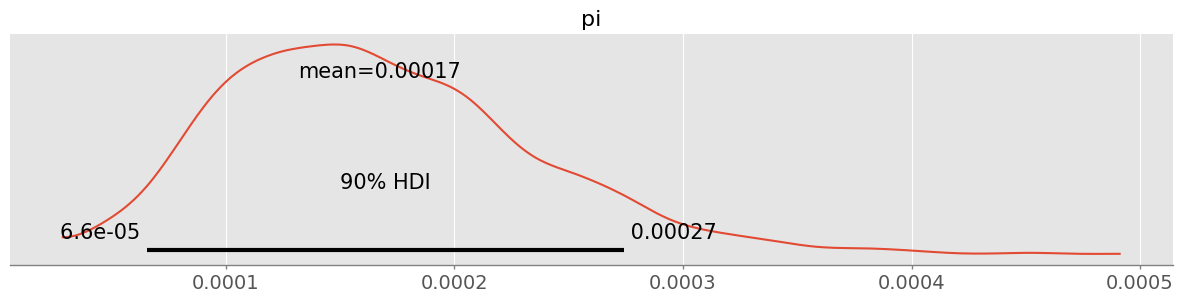

In [215]:
pm.plot_posterior(trace, hdi_prob=0.9)

In [216]:
with defective_screw_model:
    y_new = pm.Binomial('y_new', p=pi, n=30_000)
    predictions = pm.sample_posterior_predictive(trace, var_names=["y_new"])

Sampling: [y_new]


Output()

<Axes: title={'center': 'y_new'}>

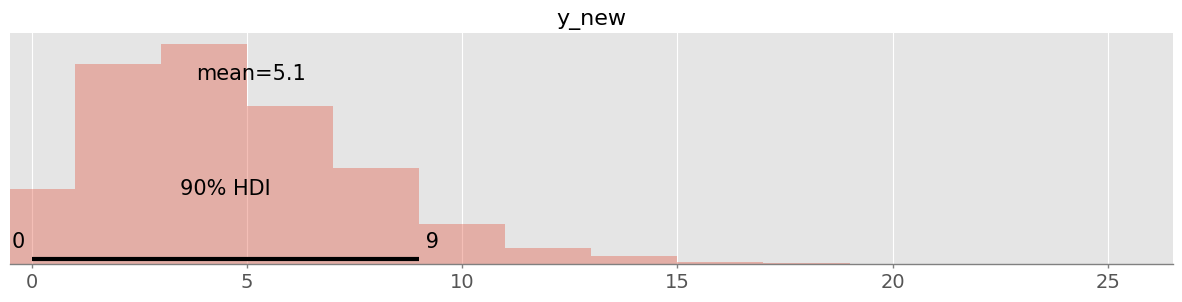

In [217]:
pm.plot_posterior(predictions.posterior_predictive.y_new, hdi_prob=0.9)

In [218]:
pm.hdi(predictions.posterior_predictive.y_new, hdi_prob=0.9).y_new.values

array([0., 9.])

In [220]:
n_new = 30000
aleatoric_vars = n_new * trace.posterior.pi.values * (1 - trace.posterior.pi.values)
aleatoric_var = np.mean(aleatoric_vars)
aleatoric_var

5.018057933216053

In [221]:
epistemic_var = np.var(trace.posterior.pi.values * n_new)
epistemic_var

4.071961550586017

In [222]:
predictive_var = np.var(predictions.posterior_predictive.y_new.values)
predictive_var, aleatoric_var + epistemic_var

(9.31580975, 9.09001948380207)

In [223]:
with pm.Model() as defective_screw_model2:
    pi = pm.Exponential('pi', lam=1 / mean_rate)
    y = pm.Binomial('y', n=60000, p=pi, observed=8)
    trace2 = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [pi]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


<Axes: title={'center': 'pi'}>

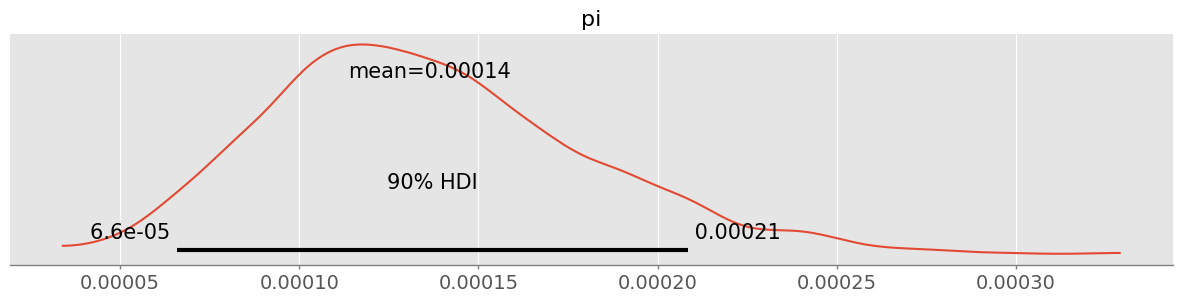

In [224]:
pm.plot_posterior(trace2, hdi_prob=0.9)

In [225]:
pm.hdi(trace2, hdi_prob=0.9).pi.values

array([6.58322149e-05, 2.08407789e-04])

# Exercise 4